In [1]:
#Step1. Mount drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!pip uninstall tensorflow

Found existing installation: tensorflow 2.12.0
Uninstalling tensorflow-2.12.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.9/dist-packages/tensorflow-2.12.0.dist-info/*
    /usr/local/lib/python3.9/dist-packages/tensorflow/*
Proceed (Y/n)? y
  Successfully uninstalled tensorflow-2.12.0


In [3]:
!pip install tensorflow==2.7.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.7/489.7 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 463.1/463.1 KB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 5.3 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.3.3
    Uninstalling flatbuffers-23.3.3:
      Successfully uninstalled flatbuffers-23.3.3


In [4]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [5]:
IMAGE_SIZE = 256
BATCH_SIZE = 16
CHANNELS = 3

In [6]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [7]:
dataset = image_dataset_from_directory(
    "/content/gdrive/MyDrive/Anh/train",
    seed = 1234,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 3115 files belonging to 36 classes.


In [8]:
class_names = dataset.class_names
class_names

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [9]:
len(dataset)


195

In [10]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(16, 256, 256, 3)
[33  5 23 30 31 10 19 30 32 13  5 10 25 33 10 30]


In [11]:

for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].numpy())
    #print(labels_batch.numpy())

[[[ 45.41992   121.91992     0.       ]
  [ 68.95996   169.45996    84.95996  ]
  [106.799805  190.08008   145.83984  ]
  ...
  [ 76.600586  156.60059   129.44043  ]
  [ 67.46094   146.18066   127.30078  ]
  [ 72.48047   128.4209    117.7207   ]]

 [[ 44.240234  120.740234    0.       ]
  [ 62.86035   163.36035    78.86035  ]
  [ 81.14258   179.9414    119.14258  ]
  ...
  [ 53.740234  105.82129    94.46094  ]
  [ 53.379883   83.66211    81.44141  ]
  [ 52.960938   74.80176    75.44141  ]]

 [[ 50.09961   118.299805    0.       ]
  [ 47.100586  134.80176     2.4023438]
  [ 42.100586  132.60352     8.3046875]
  ...
  [ 42.700195   75.20117    63.30078  ]
  [ 40.100586   52.500977   58.30078  ]
  [ 43.5        43.100586   53.40039  ]]

 ...

 [[148.99902   115.29883   112.59961  ]
  [146.69824   111.99805   115.49902  ]
  [142.70117   107.70117   114.70117  ]
  ...
  [ 46.901367   34.500977   28.700195 ]
  [ 32.30078    22.300781   13.300781 ]
  [ 31.600586   21.600586   12.600586 ]]

 [

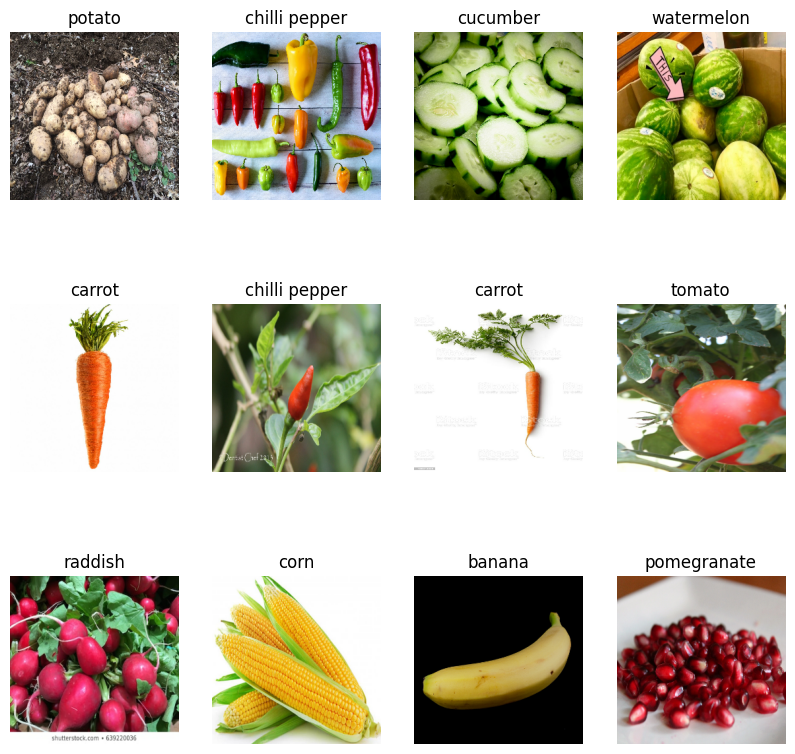

In [12]:
#visulaize

plt.figure(figsize=(10,10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [13]:
def get_dataset(ds,train_split=0.8, val_split= 0.1, test_split = 0.1, shuffle =True, shuffle_size = 10000):
  assert(train_split+test_split+val_split)==1
  ds_size=len(ds)
  if shuffle:
    ds = ds.shuffle(shuffle_size, seed = 12)

  train_size = int(train_split*ds_size)
  val_size =   int(val_split*ds_size)

  train_ds = ds.take(train_size)
  val_ds = ds.skip(train_size).take(val_size)
  test_ds = ds.skip(train_size).skip(val_size)
  return train_ds, val_ds, test_ds

In [14]:
train_ds, val_ds, test_ds = get_dataset(dataset)

In [15]:
len(train_ds)

156

In [16]:
len(val_ds)

19

In [17]:
len(test_ds)

20

In [18]:
#shuffer
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [19]:
#building the build
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1./255)
])

In [20]:
#data augmentation
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])


In [21]:
#apply data augmentation on training data
train_ds = train_ds.map(
    lambda x,y: (data_augmentation(x, training=True),y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [22]:
#model
from keras import Sequential
from keras.layers import Conv2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import MaxPooling2D


In [23]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 36
model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(64,activation='softmax'),
])
model.build(input_shape=input_shape)

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (16, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (16, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (16, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (16, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (16, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (16, 60, 60, 64)         

In [25]:
#compiling the model
model.compile(
    optimizer='adam',
    loss =tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    batch_size = BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs = 50,
)

In [27]:
scores = model.evaluate(test_ds)

20/20 [==============================] - 69s 15ms/step - loss: 1.3095 - accuracy: 0.5937


In [ ]:
scores

In [ ]:
history
history.history.keys()

In [30]:
type(history.history['loss'])
len(history.history['loss'])
history.history['loss'][:5]

[3.7291629314422607,
 3.3346550464630127,
 3.2491915225982666,
 3.1996898651123047,
 3.073625326156616]

In [31]:
acc = g=history.history['accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

first image to predict
actual label: bell pepper
predicted label: soy beans


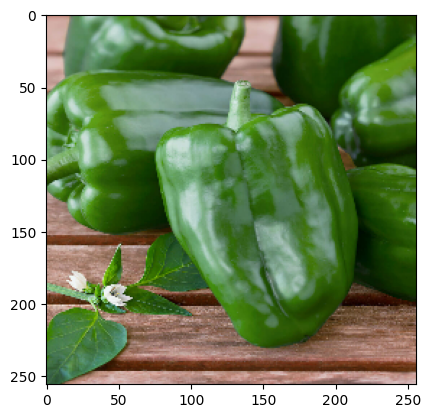

In [32]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
  first_image = images_batch[0].numpy().astype('uint8')
  first_label = labels_batch[0].numpy()
  print("first image to predict")
  plt.imshow(first_image)
  print("actual label:", class_names[first_label])
  batch_prediction = model.predict(image_batch)
  print("predicted label:" ,class_names[np.argmax(batch_prediction[0])])

In [33]:
def predict(model, img):
  img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array = tf.expand_dims(img_array,0)
  predictions = model.predict(img_array)
  predicted_class = class_names[np.argmax(predictions[0])]
  confidence = round(100*(np.max(predictions[0])),2)
  return predicted_class, confidence

In [34]:
plt.figure(figsize =(15,15))
for images, labels in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    predicted_class, confidence = predict(model, images[i].numpy())
    actual_class =class_names[labels[i]]
    plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}. \n Confidence: {confidence}%")

Output hidden; open in https://colab.research.google.com to view.

In [35]:
model.save('/content/gdrive/MyDrive/Anh/modelTrain_fruitRecognition.h5')